In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

import matplotlib.pyplot as plt
import numpy as np

X,y = mnist['data'], mnist['target']
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


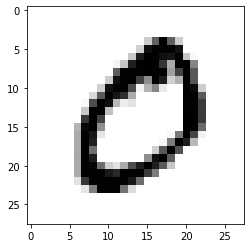

In [2]:
some_digit = X[1]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap='binary')
plt.show()

In [3]:
y = y.astype(np.int8)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [7]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train, y_train)

C:\Users\bptran\AppData\Local\Continuum\anaconda3\envs\rlcourse\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

5
[5]


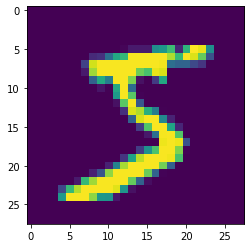

In [11]:
plt.imshow(X_train[0].reshape(28,28))
print(y_train[0])
print(svm_clf.predict(X_train[0][np.newaxis,...]))

In [22]:
print(svm_clf.predict(X_train[0:5].reshape(-1, 784)))
np.argmax(svm_clf.decision_function(X_train[0:5].reshape(-1, 784)), axis=1)

[5 0 4 1 9]


array([5, 0, 4, 1, 9], dtype=int64)

In [23]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8)

In [26]:
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
ovr_clf = OneVsRestClassifier(SVC())
ovo_clf = OneVsOneClassifier(SVC())

In [ ]:
ovr_clf.fit(X_train, y_train)

C:\Users\bptran\AppData\Local\Continuum\anaconda3\envs\rlcourse\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bptran\AppData\Local\Continuum\anaconda3\envs\rlcourse\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bptran\AppData\Local\Continuum\anaconda3\envs\rlcourse\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  

In [ ]:
ovo_clf.fit(X_train, y_train)

In [ ]:
print(ovr_clf.predict(X_train[0:5].reshape(-1, 784)))
print(ovr_clf.decision_function(X_train[0:5].reshape(-1, 784)))
print(np.argmax(ovr_clf.decision_function(X_train[0:5].reshape(-1, 784)), 
                axis=1))
print(np.mean(y_train == ovr_clf.predict(X_train)))

print(ovo_clf.predict(X_train[0:5].reshape(-1, 784)))
print(ovo_clf.decision_function(X_train[0:5].reshape(-1, 784)))
print(np.argmax(ovo_clf.decision_function(X_train[0:5].reshape(-1, 784)), 
                axis=1))
print(np.mean(y_train == ovo_clf.predict(X_train)))
